# Simple Linear Regression

Linear regression is a supervised learning algorithm used for predicting a continuous outcome variable (also called the dependent variable) based on one or more predictor variables (also called independent variables).

This notebook is an implementation of simple linear regression for learning purposes.

## Algorithm

Here is the equation for the _ith_ element of _y_, where $\alpha$ is the y-intercept, $\beta$ is the slope and $\epsilon$ is the error. 

$y_{i} = \alpha + \beta x_{i} + \epsilon_{i}$

We want to minimize the error squared.

$min Q(\alpha, \beta) = \sum_{i=1}^{n}(\hat{\epsilon_{i}})^2 = \sum_{i=1}^{n}(y_{i} - \alpha - \beta x_{i})^2$

Through some math that I don't follow we end up with:

$\hat{\alpha} = \bar{y} - (\hat{\beta} \bar{x})$

$\hat{\beta} = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum_{i=1}^{n}(x_{i} - \bar{x})^2}$

For $\beta$, it further reduces:

$\beta = \frac{\text{sample covariance}}{\text{sample variance}}$

$\beta = \text{sample correlation coefficient} * \frac{\text{uncorrected standard deviation of } y}{\text{uncorrected standard deviation of } x}$

See [Wikipedia](https://en.wikipedia.org/wiki/Simple_linear_regression) for more information, especially the _Numerical example_ section.

In [1]:
import numpy as np

# I used ChatGPT to generate some of this and it decided to use
# the means * n instead of sums, which is probably slightly faster
# since it reduces the amount that needs to be calculated
def simple_linear_regression(x, y):
    num_samples = np.size(x)
    assert(num_samples == np.size(y))

    x_mean = np.mean(x)
    y_mean = np.mean(y)

    S_xy = np.sum(x * y)
    S_xx = np.sum(x * x)
    
    # beta is the slope
    beta_numerator = S_xy - (num_samples * x_mean * y_mean)
    beta_denominator = S_xx - (num_samples * x_mean * x_mean)
    beta = beta_numerator / beta_denominator
    
    # alpha is the y-intercept
    alpha = y_mean - (beta * x_mean)
    
    # predicted/fitted y
    y_fit = alpha + beta * x

    # total sum of squares
    SST = np.sum((y - y_mean)**2)

    # residual sum of squares
    SSR = np.sum((y - y_fit)**2)

    # R^2 coefficient of determination
    R_squared = 1 - (SSR / SST)
    
    return (alpha, beta, R_squared)

## Data

Now, let's load some data into a `DataFrame`. This data is taken from the _Numerical example_ on the Wikipedia page linked above.

In [2]:
import pandas as pd

data = {
    'height': [1.47, 1.50, 1.52, 1.55, 1.57, 1.60, 1.63,
               1.65, 1.68, 1.70, 1.73, 1.75, 1.78, 1.80, 1.83],
    'mass': [52.21, 53.12, 54.48, 55.84, 57.20, 58.57, 59.93,
             61.29, 63.11, 64.47, 66.28, 68.10, 69.92, 72.19, 74.46]
}

df = pd.DataFrame(data)
df

,height,mass
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


In [3]:
df.describe()

,height,mass
count,15.000000,15.000000
mean,1.650667,62.078000
std,0.114235,7.037515
min,1.470000,52.210000
25%,1.560000,56.520000
50%,1.650000,61.290000
75%,1.740000,67.190000
max,1.830000,74.460000


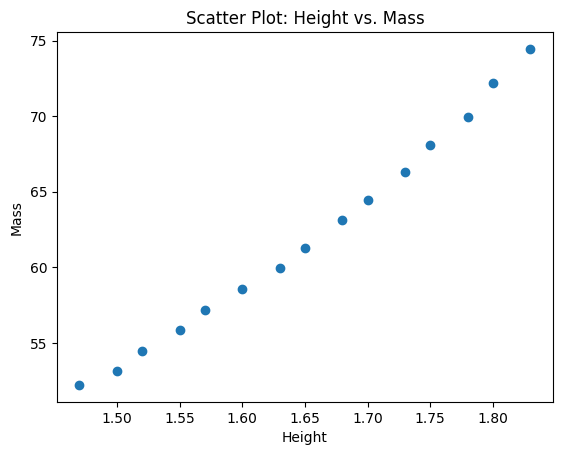

In [4]:
import matplotlib.pyplot as plt

plt.scatter(df['height'], df['mass'])
plt.xlabel('Height')
plt.ylabel('Mass')
plt.title('Scatter Plot: Height vs. Mass')
plt.show()

## Testing

Now, let's test the `simple_linear_regression` function against `scikit-learn`'s implementation.

In [5]:
alpha, beta, r2 = simple_linear_regression(df['height'], df['mass'])
print(f'simple_linear_regression: ({alpha}, {beta}, {r2})')

simple_linear_regression: (-39.061955918839416, 61.272186542107896, 0.9891969224457968)


In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

# reshape the columns to be an array of single-element arrays
# this is what scikit-learn's fit expects
# X: {array-like, sparse matrix} of shape (n_samples, n_features)
# y: array-like of shape (n_samples,) or (n_samples, n_targets)
X = df['height'].values.reshape(-1, 1)
y = df['mass'].values.reshape(-1, 1)

reg.fit(X, y)

sklearn_alpha = reg.intercept_[0]
sklearn_beta = reg.coef_[0][0]
sklearn_r2 = reg.score(X, y)

print(f'sklearn: ({sklearn_alpha}, {sklearn_beta}, {sklearn_r2})')

sklearn: (-39.06195591884392, 61.272186542110624, 0.9891969224457968)


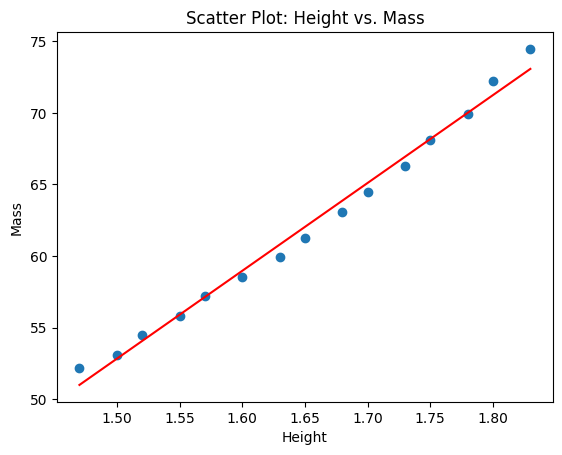

In [7]:
plt.scatter(df['height'], df['mass'])
plt.xlabel('Height')
plt.ylabel('Mass')
plt.title('Scatter Plot: Height vs. Mass')

plt.plot(df["height"], alpha + beta * df['height'], color="red", label="Regression")

plt.show()

## Prediction

Now, let's try to predict a value and again compare it to `scikit-learn`.

In [8]:
predicted_height = 2.0
predicted_mass = alpha + (beta * predicted_height)
print(f'predicted: ({predicted_height}, {predicted_mass})')

sklearn_mass = reg.predict([[predicted_height]])[0][0]
print(f'sklearn: ({predicted_height}, {sklearn_mass})')

predicted: (2.0, 83.48241716537638)
sklearn: (2.0, 83.48241716537733)
